In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [136]:
def morsespace(ga,be,N,D=4,low=None,high=None):
    if low is None: low=[5,N]
    if len(low)==2: low.append(0)
    if high is None: high=[0.1,np.pi]
    high=min([high[1],morsehigh(ga,be,high[0])])
    low=max(low[2],morsespace_low(ga,be,low[0],low[1]))
    r=1+1.0/(D*morseprops(ga,be)[0]);
    N=int(floor(log((1.0*high/low))/log(r)))
    fs=high*np.ones([N+1])/r**np.arange(0,N+1)
    return fs
def morsehigh(ga,be,alpha):
    ga,be=float(ga),float(be)
    N=10000;
    omhigh=np.linspace(0,np.pi,N)
    f=0.
    if 1:
        om=morsefreq(ga,be)*np.pi/omhigh;
        lnpsi1=(be/ga)*log((exp(1.0)*ga/be));
        lnpsi2=be*log(om)-om**ga;
        lnpsi=lnpsi1+lnpsi2;
        index=log(alpha)-lnpsi<0;
        return omhigh[index][0];
def morsefreq(ga,be):
    ga,be=float(ga),float(be)    
    if be<>0:
        fm=exp((1.0/ga)*(log(be)-log(ga)));
    else:
        fm = (log(2.0))**(1.0/ga)
    return fm
def morsespace_low(ga,be,r,N):
    p=morseprops(ga,be)[0];
    fmin=(2*sqrt(2.0)*p*r/N);
    return fmin
def morseprops(ga,be):
    ga,be=float(ga),float(be)    
    p=sqrt(be*ga);
    skew= (ga-3/p);
    kurt=3-skew**2- (2.0/p**2);
    return p,skew,kurt

In [137]:
assert np.allclose(morsefreq(3,2), 0.873580464736299)
assert np.allclose(morsefreq(3,0), 0.884997044500518),morsefreq(3,0)

In [138]:
assert np.allclose(morsehigh(3,2,0.1), 1.701656746858918)
assert np.allclose(morsehigh(3,5,0.1),2.033756300298703)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in divide
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


In [149]:
a=morsespace(ga=3,be=2,N=16000)
assert a.shape==(69,)
assert np.allclose(a.sum(),18.351929410140986)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in divide
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


In [156]:
fs=morsespace(ga=3,be=2,N=16000)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in divide
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in subtract
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in less


In [165]:
def morsetrans(x,ga,be,fs,method='bandpass' ):
    assert False    
    print len(x),ga,be,fs,method
    psi,W=morsewave(len(x),ga,be,fs,method)
    _,L=W.shape
    #W=conj(W)
    X=fft(x)
    T=nan*ones(M0,L,N,K);
    Ttemp=ifft( x.reshape([1,-1])*W);
def morsewave(N,ga,be,fs,method):
    assert False
    ga,be=float(ga),float(be)    
    assert (fs>0).all()
    x=np.zeros([N,len(fs)] );
    X=np.zeros([N,len(fs)] );
    for i,f in enumerate(fs):
        v1,v2=morsewave1(N,ga,be,abs(f),method)
        x[:,i]=v1
        X[:,i]=v2
    return x,X
def morsewave1(N,ga,be,f,method):
    assert False
    fo=morsefreq(ga,be)[0];
    fact=fss/fo;
    om=2*pi*np.linspace(0,1-1./N,N)/fact;
    if method='energy':
        if be==0:
            psizero=exp(-om**ga);
        else:
            psizero=exp(be*log(om)-om**ga);
    elif method='bandpass'
        if be==0:
            psizero=2*exp(-om**ga);
        else:
            psizero=2*exp(-be**log(fo)+fo**ga+be*log(om)-om**ga);
    else:
        raise 0
    
    psizero(1)=1.0/2*psizero[1]; #%Due to unit step function
    vswap(psizero,nan,0);

    X=morsewave_first_family(fact,N,K,ga,be,om,psizero,method); 

    X=vswap(X,inf,0);

    ommat=vrep(vrep(om,size(X,3),3),size(X,2),2);
    Xr=X*rot(ommat*(N+1)/2*fact); #%ensures wavelets are centered 
    x=ifft(Xr);

    return X,x

In [348]:
import scipy.io
def morsetrans(x,ga,be,method='bandwidth' ):
    filename='morse_g{:.2f}_b{:.2f}_{}.mat'.format(ga,be,method)
    W=scipy.io.loadmat(filename)['W']
    print filename,W.shape,W.dtype,np.sum(W)
    X=np.fft.fft(x)
    print X.shape,X.dtype ,X.sum()
    print np.sum(X.reshape([-1,1])*W)
    return np.fft.ifft( X.reshape([-1,1])*W,axis=0).T;

In [323]:
#morsewave(16000, 3, 2,fs,method='bandpass')

In [324]:
import soundfile  
filename='/home/bo/mydev/tsrc2017/input/train/audio/yes/8134f43f_nohash_2.wav'
x,_=soundfile.read(filename)
x.shape

(16000,)

In [325]:
len(x),sum(x)

(16000, 0.351715087890625)

In [349]:
a=morsetrans(x,3,2)

morse_g3.00_b2.00_bandwidth.mat (16000, 69) float64 90863.8001273
(16000,) complex128 (0.9765625+3.2684965845e-13j)
(-61.5949681471-2591.88560458j)


In [350]:
b=np.abs(a)

In [351]:
b.shape

(69, 16000)

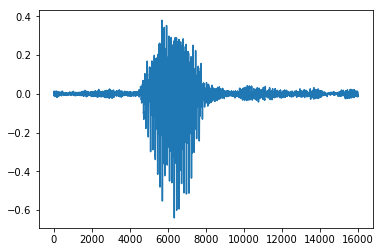

In [353]:
plot(x)

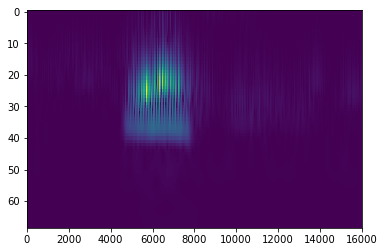

In [352]:
imshow(b,aspect='auto')